In [2]:
import pandas as pd                                             
import numpy as np     
import seaborn as sns                                         
from matplotlib import pyplot as plt                            
from sklearn.model_selection import train_test_split                         
from sklearn.tree import DecisionTreeRegressor                  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression               
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import KBinsDiscretizer


# Split The Data



In [16]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/CovidDietData.csv')
data.pop(data.columns[0]) #drop the index column
x = data.drop(columns = 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000')
y = data['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0 )


# Linear Regression



The learning score on train set 0.8569540166980008
The learning score on test set 0.874293212629689
r2 score =  0.874293212629689


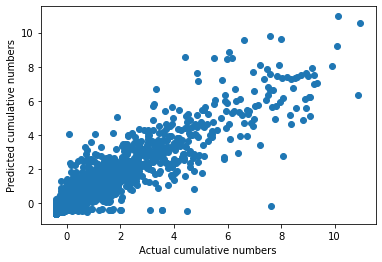

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_test = lr.predict(x_test)
plt.scatter(y_test, y_pred_test)
print("The learning score on train set",lr.score(x_train,y_train))
print("The learning score on test set",lr.score(x_test,y_test))
print("r2 score = ", r2_score(y_test, y_pred_test)) # Coefficient of determination : measures the prediction quality of a linear regression) | close to 1 means its a good model, close to 0 means its a bad model
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()


# Decision Tree




r2 score =  0.8404374064237984
The learning score on train set 0.9882903256681124
The learning score on test set 0.8404374064237984


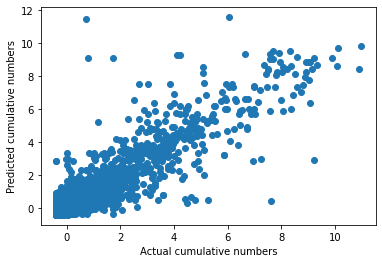

In [18]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train, y_train)
y_predict = dt.predict(x_test)
print("r2 score = ",r2_score(y_test, y_predict))
print("The learning score on train set", dt.score(x_train,y_train))
print("The learning score on test set", dt.score(x_test,y_test))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()


# Random Forests



The learning score on train set 0.9762311280297797
The learning score on test set 0.9143684768655681
r2 score =  0.9143684768655681


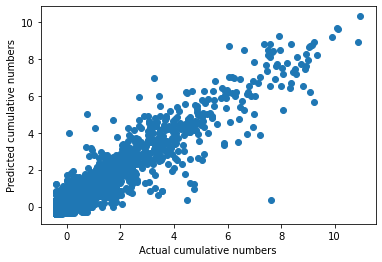

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)
print("The learning score on train set", rf.score(x_train,y_train))
print("The learning score on test set", rf.score(x_test,y_test))
print("r2 score = ",r2_score(y_test, y_predict))
plt.scatter(y_test, y_predict)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()

Comparing the actual/predicted target according to the variation of one feature

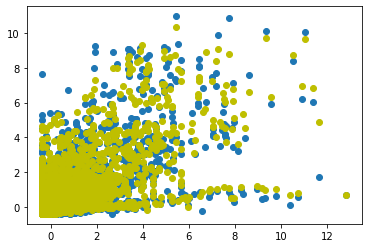

In [ ]:
plt.scatter(x_test.iloc[:,1],y_test)
plt.scatter(x_test.iloc[:,1],y_predict, c="y")

# Artificial Neural Networks



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The learning score on train set 0.9315488730263217
The learning score on test set 0.9226217577620598
0.9226217577620598


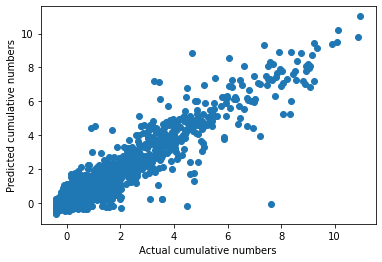

In [ ]:
nn = MLPRegressor(hidden_layer_sizes=(100,200,100,), activation='tanh',max_iter=500, solver='lbfgs');
nn.fit(x_train, y_train)
predictions =  nn.predict(x_test)
print("The learning score on train set", nn.score(x_train,y_train))
print("The learning score on test set", nn.score(x_test,y_test))
print(r2_score(y_test,predictions)) 
plt.scatter(y_test, predictions)
plt.xlabel('Actual cumulative numbers')
plt.ylabel('Predicted cumulative numbers')
plt.show()

Comparing the actual/predicted target according to the variation of one feature

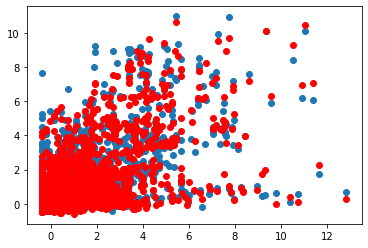

In [ ]:
plt.scatter(x_test.iloc[:,1],y_test)
plt.scatter(x_test.iloc[:,1],predictions, c="r")
plt.show()

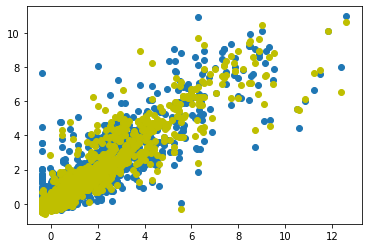

In [ ]:
plt.scatter(x_test.iloc[:,0],y_test)
plt.scatter(x_test.iloc[:,0],predictions, c="y")